In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy import stats

In [3]:
wa_data = pd.read_csv('../Inputs/SALESInputs/WA_MJ_Sales_and_Taxes.csv')
wa_data = wa_data[:-1]
wa_data = wa_data.rename(columns={
    'Month of Activity2': 'Month',
    'Taxable retail sales as reported by marijuana collectives (before tax)3': 'Taxable Retail Sales',
    'Estimated retail value of marijuana and marijuana products sold at a licensed marijuana retailer (before tax)4': 'Estimated Retail Value',
    'Total retail value of marijuana and marijuana products (before tax)': 'Total Retail Value',
    'Sales exempt from sales tax for medical purposes5': 'Tax-exempt Sales',
    'Estimated retail value of marijuana and marijuana products subject to state and local sales taxes': 'Est. Retail Value subject to Tax',
    'Estimated state sales tax collections': 'Est. State Sales Tax Collections',
    'Weighted average local sales tax rate6': 'Avg. Local Sales Tax Rate',
    'Estimated local sales tax collections': 'Est. Local Sales Tax Collections'
})
wa_data['State'] = 'WA'
#wa_data['Month2'] = np.arange(7,58)
wa_data

,Month,Year,Taxable Retail Sales,Estimated Retail Value,Total Retail Value,Tax-exempt Sales,Est. Retail Value subject to Tax,Est. State Sales Tax Collections,Avg. Local Sales Tax Rate,Est. Local Sales Tax Collections,State
0,July,2014,7478000,1847000,9325000,0,9325000,606000,0.024696,230000,WA
1,August,2014,7347000,4555000,11902000,0,11902000,774000,0.024696,294000,WA
2,September,2014,8598000,5806000,14404000,0,14404000,936000,0.024696,356000,WA
3,October,2014,7597000,7746000,15344000,0,15344000,997000,0.024696,379000,WA
4,November,2014,7526000,9091000,16618000,0,16618000,1080000,0.024696,410000,WA
5,December,2014,12405000,11605000,24010000,0,24010000,1561000,0.024696,593000,WA
6,January,2015,10237000,13096000,23334000,0,23334000,1517000,0.024696,576000,WA
7,February,2015,9869000,16086000,25955000,0,25955000,1687000,0.024696,641000,WA
8,March,2015,11367000,21363000,32730000,0,32730000,2127000,0.024696,808000,WA
9,April,2015,11451000,24854000,36306000,0,36306000,2360000,0.024696,897000,WA


In [4]:
wa_data = wa_data[['Month', 'Year', 'Total Retail Value', 'State']]
wa_data = wa_data.rename(columns={
    'Total Retail Value':'Total Sales'
})
wa_data

,Month,Year,Total Sales,State
0,July,2014,9325000,WA
1,August,2014,11902000,WA
2,September,2014,14404000,WA
3,October,2014,15344000,WA
4,November,2014,16618000,WA
5,December,2014,24010000,WA
6,January,2015,23334000,WA
7,February,2015,25955000,WA
8,March,2015,32730000,WA
9,April,2015,36306000,WA


In [5]:
wa_data['Year']= wa_data['Year'].astype('str', )
wa_data

,Month,Year,Total Sales,State
0,July,2014,9325000,WA
1,August,2014,11902000,WA
2,September,2014,14404000,WA
3,October,2014,15344000,WA
4,November,2014,16618000,WA
5,December,2014,24010000,WA
6,January,2015,23334000,WA
7,February,2015,25955000,WA
8,March,2015,32730000,WA
9,April,2015,36306000,WA


In [6]:
wa_data['Date'] = wa_data['Month'].str.cat(others=wa_data['Year'])
wa_data['Date'] = pd.to_datetime(pd.Series(wa_data['Date']),
                                format="%B%Y")
wa_data

,Month,Year,Total Sales,State,Date
0,July,2014,9325000,WA,2014-07-01
1,August,2014,11902000,WA,2014-08-01
2,September,2014,14404000,WA,2014-09-01
3,October,2014,15344000,WA,2014-10-01
4,November,2014,16618000,WA,2014-11-01
5,December,2014,24010000,WA,2014-12-01
6,January,2015,23334000,WA,2015-01-01
7,February,2015,25955000,WA,2015-02-01
8,March,2015,32730000,WA,2015-03-01
9,April,2015,36306000,WA,2015-04-01


In [7]:
co_data = pd.read_csv('../Inputs/SALESInputs/CO_MJ_Sales.csv')
co_data['State'] = 'CO'
co_data = co_data.drop(columns=[
    'Medical Monthly Sales',
    'Medical YTD'
])
co_data = co_data[:-1]
co_data = co_data[['Month', 'Year', 'Total Monthly Sales', 'State']]
co_data = co_data.rename(columns={
    'Total Monthly Sales':'Total Sales'
})
co_data['Total Sales']= co_data['Total Sales'].astype(int)
co_data

,Month,Year,Total Sales,State
0,January,2014.0,46563933,CO
1,February,2014.0,45987045,CO
2,March,2014.0,54703509,CO
3,April,2014.0,53452855,CO
4,May,2014.0,52730209,CO
5,June,2014.0,53928391,CO
6,July,2014.0,61004415,CO
7,August,2014.0,67432834,CO
8,September,2014.0,63066595,CO
9,October,2014.0,62965201,CO


In [8]:
co_data['Year']= co_data['Year'].astype(str)
co_data['Year'] = co_data['Year'].str.replace('.0', '')
co_data

,Month,Year,Total Sales,State
0,January,14,46563933,CO
1,February,14,45987045,CO
2,March,14,54703509,CO
3,April,14,53452855,CO
4,May,14,52730209,CO
5,June,14,53928391,CO
6,July,14,61004415,CO
7,August,14,67432834,CO
8,September,14,63066595,CO
9,October,14,62965201,CO


In [9]:
co_data['Date'] = co_data['Month'].str.cat(others=co_data['Year'])
co_data['Date'] = co_data['Date'].str.replace(' ', '')
co_data['Date'] = pd.to_datetime(pd.Series(co_data['Date']), format="%B%y")
co_data

,Month,Year,Total Sales,State,Date
0,January,14,46563933,CO,2014-01-01
1,February,14,45987045,CO,2014-02-01
2,March,14,54703509,CO,2014-03-01
3,April,14,53452855,CO,2014-04-01
4,May,14,52730209,CO,2014-05-01
5,June,14,53928391,CO,2014-06-01
6,July,14,61004415,CO,2014-07-01
7,August,14,67432834,CO,2014-08-01
8,September,14,63066595,CO,2014-09-01
9,October,14,62965201,CO,2014-10-01


In [10]:
ak_data = pd.read_csv('../Inputs/SALESInputs/AK_MJ_Sales.csv')
ak_data = ak_data[:-1]
ak_data = ak_data[2:]
ak_data['State'] = 'AK'
ak_data = ak_data[['Month', 'Year', 'Total Sales', 'State']]
ak_data

,Month,Year,Total Sales,State
2,December,2016.0,830384.0,AK
3,January,2017.0,589072.0,AK
4,February,2017.0,709520.0,AK
5,March,2017.0,1204400.0,AK
6,April,2017.0,1467088.0,AK
7,May,2017.0,1514080.0,AK
8,June,2017.0,2849744.0,AK
9,July,2017.0,3203424.0,AK
10,August,2017.0,3845568.0,AK
11,September,2017.0,3906432.0,AK


In [11]:
ak_data['Year']= ak_data['Year'].astype(str)
ak_data['Year'] = ak_data['Year'].str.replace('.0', '')
ak_data

,Month,Year,Total Sales,State
2,December,16,830384.0,AK
3,January,17,589072.0,AK
4,February,17,709520.0,AK
5,March,17,1204400.0,AK
6,April,17,1467088.0,AK
7,May,17,1514080.0,AK
8,June,17,2849744.0,AK
9,July,17,3203424.0,AK
10,August,17,3845568.0,AK
11,September,17,3906432.0,AK


In [12]:
ak_data['Date'] = ak_data['Month'].str.cat(others=ak_data['Year'])
ak_data['Date'] = ak_data['Date'].str.replace(' ', '')
ak_data['Date'] = pd.to_datetime(pd.Series(ak_data['Date']), format="%B%y")
ak_data

,Month,Year,Total Sales,State,Date
2,December,16,830384.0,AK,2016-12-01
3,January,17,589072.0,AK,2017-01-01
4,February,17,709520.0,AK,2017-02-01
5,March,17,1204400.0,AK,2017-03-01
6,April,17,1467088.0,AK,2017-04-01
7,May,17,1514080.0,AK,2017-05-01
8,June,17,2849744.0,AK,2017-06-01
9,July,17,3203424.0,AK,2017-07-01
10,August,17,3845568.0,AK,2017-08-01
11,September,17,3906432.0,AK,2017-09-01


In [13]:
ore_data = pd.read_csv('../Inputs/SALESInputs/OR_MJ_Sales.csv')
ore_data = ore_data.drop(columns=['Unnamed: 4'])
ore_data['State'] = 'OR'
ore_data = ore_data[['Month', 'Year', 'Total Sales', 'State']]
ore_data 

,Month,Year,Total Sales,State
0,February,2016,14612764.71,OR
1,March,2016,25639729.41,OR
2,April,2016,21971241.18,OR
3,May,2016,25526117.65,OR
4,June,2016,33738282.35,OR
5,July,2016,32552641.18,OR
6,August,2016,43207535.29,OR
7,September,2016,39291676.47,OR
8,October,2016,46065629.41,OR
9,November,2016,38022805.88,OR


In [14]:
ore_data['Year']= ore_data['Year'].astype(str)
ore_data['Year'] = ore_data['Year'].str.replace('.0', '')
ore_data['Date'] = ore_data['Month'].str.cat(others=ore_data['Year'])
ore_data['Date'] = ore_data['Date'].str.replace(' ', '')
ore_data['Date'] = pd.to_datetime(pd.Series(ore_data['Date']), format="%B%y")
ore_data

,Month,Year,Total Sales,State,Date
0,February,16,14612764.71,OR,2016-02-01
1,March,16,25639729.41,OR,2016-03-01
2,April,16,21971241.18,OR,2016-04-01
3,May,16,25526117.65,OR,2016-05-01
4,June,16,33738282.35,OR,2016-06-01
5,July,16,32552641.18,OR,2016-07-01
6,August,16,43207535.29,OR,2016-08-01
7,September,16,39291676.47,OR,2016-09-01
8,October,16,46065629.41,OR,2016-10-01
9,November,16,38022805.88,OR,2016-11-01


<IPython.core.display.Javascript object>


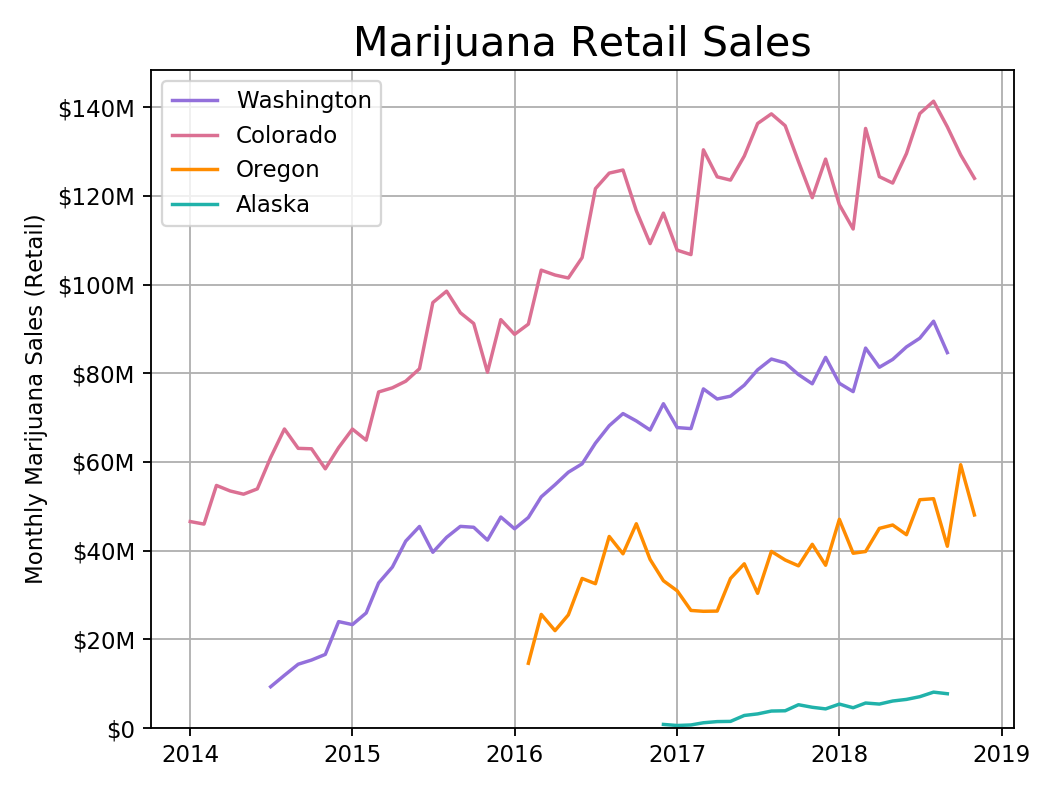

In [16]:
fig1,ax1=plt.subplots()

ax1.plot(wa_data['Date'], wa_data['Total Sales'], color="mediumpurple", label="Washington")
ax1.plot(co_data['Date'], co_data['Total Sales'], color="palevioletred", label="Colorado")
ax1.plot(ore_data['Date'], ore_data['Total Sales'], color="darkorange", label="Oregon")
ax1.plot(ak_data['Date'], ak_data['Total Sales'], color="lightseagreen", label="Alaska")
ax1.xaxis_date()

plt.title('Marijuana Retail Sales', fontsize=18)
plt.legend()

plt.ylim(0, max(co_data['Total Sales']*1.05))
plt.ylabel('Monthly Marijuana Sales (Retail)')
y_labels = ['$0', '$20M', '$40M', '$60M', '$80M', '$100M', '$120M', '$140M']
ax1.set_yticklabels(y_labels)

plt.tight_layout()
plt.grid()

plt.show()

In [17]:
plt.savefig('../SALES_Jason/retail_mj_sales.png')